# 背景信息
    Rossmann是欧洲的一家连锁药店，在7个欧洲国家拥有3,000家药店。 目前，罗斯曼店经理的任务是提前六周预测其日销量。 商店销售受到诸多因素的影响，包括促销，竞争，学校和国家假日，季节性和地点。 可靠的销售预测使商店经理能够创建有效的员工时间表，从而提高生产力和动力。该数据集来源于https://www.kaggle.com/c/rossmann-store-sales#evaluation


## 数据集说明
### 该数据集由以下三部分
    train.csv - 历史数据，包括销售
    test.csv - 不包括销售额的历史数据
    sample_submission.csv - 正确格式的示例提交文件
    store.csv - 有关商店的补充信息

### 字段解释

    Id - 代表测试集中（存储，日期）双倍的Id 
    Store - 每个商店的唯一ID
    Sales - 任何一天的营业额（这是你所预测的）
    Customers - 某一天的客户数量
    Open - 商店是否开放的指标：0 =关闭，1 =开放
    StateHoliday - 表示州休假。通常情况下，除了少数例外，所有商店都将在节假日关闭。请注意，所有学校在公共假期和周末都关闭。a =公众假期，b =复活节假期，c =圣诞节，0 =无
    SchoolHoliday - 表示（商店，日期）是否因公立学校关闭而受到影响
    StoreType  - 区分4种不同的商店模式：a，b，c，d
    Assortment - 描述分类级别：a =基本的，b =额外的，c =扩展的
    CompetitionDistance - 距离最近的竞争对手商店的米数
    CompetitionOpenSince [Month / Year] - 给出最接近的竞争对手开放时间的近似年份和月份
    Promo - 指示商店是否在当天运行促销
    Promo2 - Promo2对于一些商店是持续和连续的促销活动：0 =商店不参与，1 =商店参与促销2自[年/周] - 描述商店开始参与促销2的年份和日历周
    PromoInterval - 描述Promo2开始的连续间隔，命名重新开始促销的月份。例如“二月，五月，八月，十一月”是指每一轮开始于该商店任何一年的二月，五月，八月和十一月


## Rossmann数据集EDA探索
    通过这次探索性数据分析，将尝试了解以下问题
    什么会因素影响营业额
    

### 1.数据初探

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import defaultdict
import math
pd.set_option("display.max_columns",100)
from IPython.display import display
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings("ignore")

In [628]:
##加载数据集
train = pd.read_csv("train.csv",low_memory=False)
store = pd.read_csv('store.csv',low_memory=False)

In [629]:
print ("train数据集总数据量 ：", train.shape)
print ("train数据集变量各缺省的数量 ：",train.isnull().sum())
train.head(5)

train数据集总数据量 ： (1017209, 9)
train数据集变量各缺省的数量 ： Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [630]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [631]:
print ("store数据集总数据量 ：", store.shape)
print ("store数据集变量各缺省的数量 :\n",store.isnull().sum())
store.head(5)

store数据集总数据量 ： (1115, 10)
store数据集变量各缺省的数量 :
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [632]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


    从上面可以看出商店数据完整度还是比较高的，但商店的辅助信息部分变量缺省占比接近50%。接下来我们将合并数据集并成一个数据集，并采取以下分析步骤：
    1.从单变量分析
    2.相关性分析与回归
    3.根据上面分析处理缺省值
    4.相关性分析与回归
    5.进行特征筛选
    6.预建立模型
    7.确定模型
    8.进行模型优化

In [274]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [634]:
print ("合并后数据集总数据量 ：", train_store.shape)
train_store.head(5)

合并后数据集总数据量 ： (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [635]:
train_store['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

Text(0.5,0,'sales')

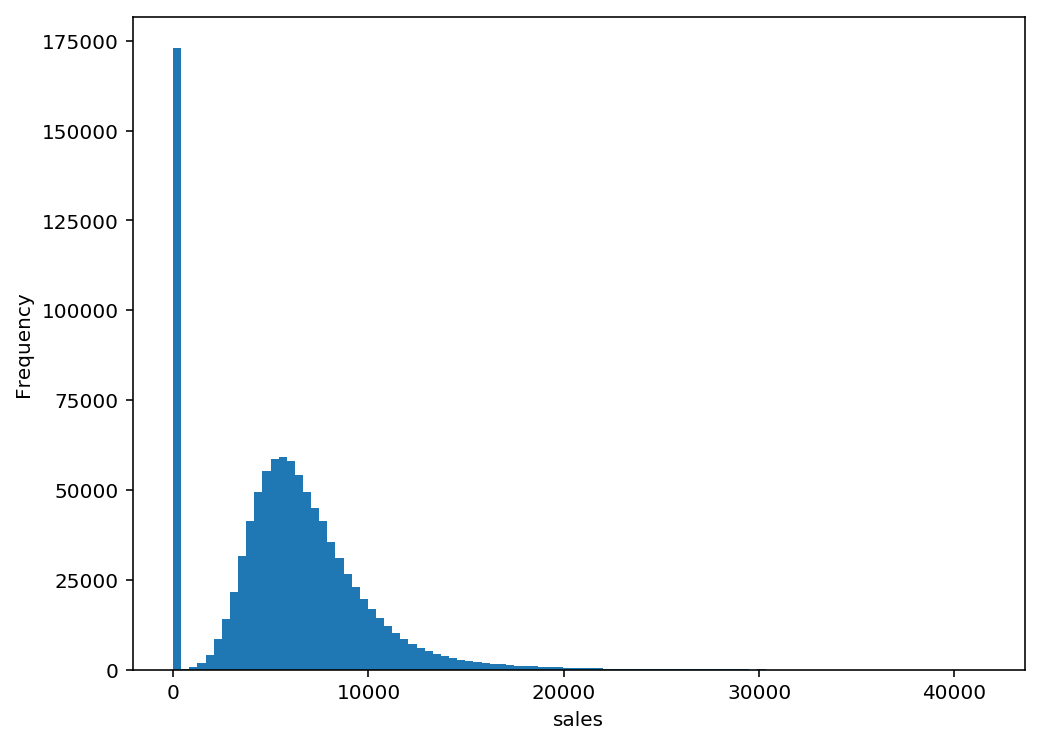

In [636]:
fig, axes = plt.subplots(figsize=(8,6))
train_store['Sales'].plot.hist(bins = 100)
axes.set_xlabel("sales")

    从图中可以看出存在大量0销售额的情况，中位数和平均数分别是5773和5744，可以看出这是一个负偏态分布，主要集中在5000-6000之间，接下来看看客户量的分布。

In [637]:
train_store['Customers'].describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

Text(0.5,0,'Customers')

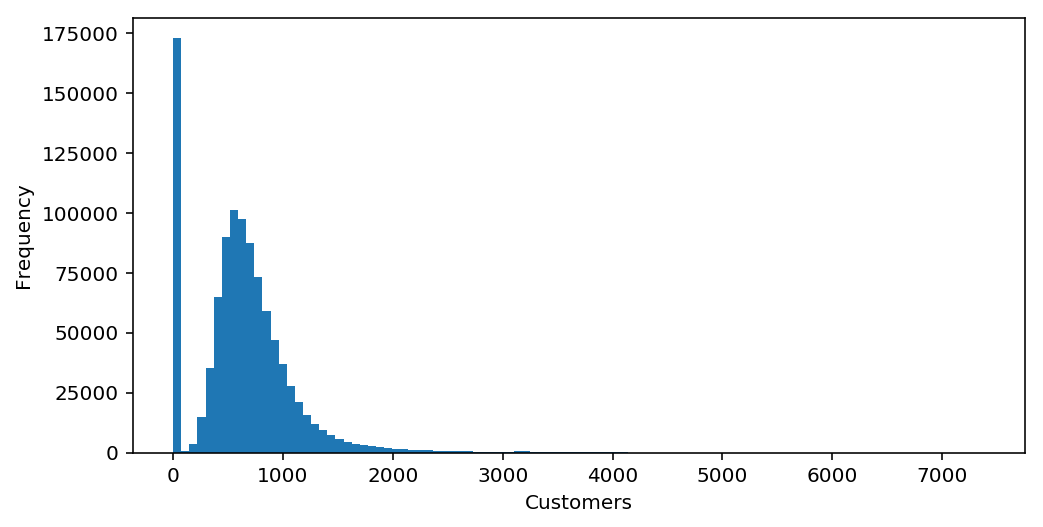

In [638]:
fig, axes = plt.subplots(figsize=(8,4))
train_store['Customers'].plot.hist(bins = 100)
axes.set_xlabel("Customers")

    可以看出客户量的图形与销售额高度相似平均值633中位数609主要集中在500-600之间。

#### 商店模式与销售额、客流量分析

    接着我们看看不同的商店类型销售额有什么变化

In [639]:
##商店模式销售额
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


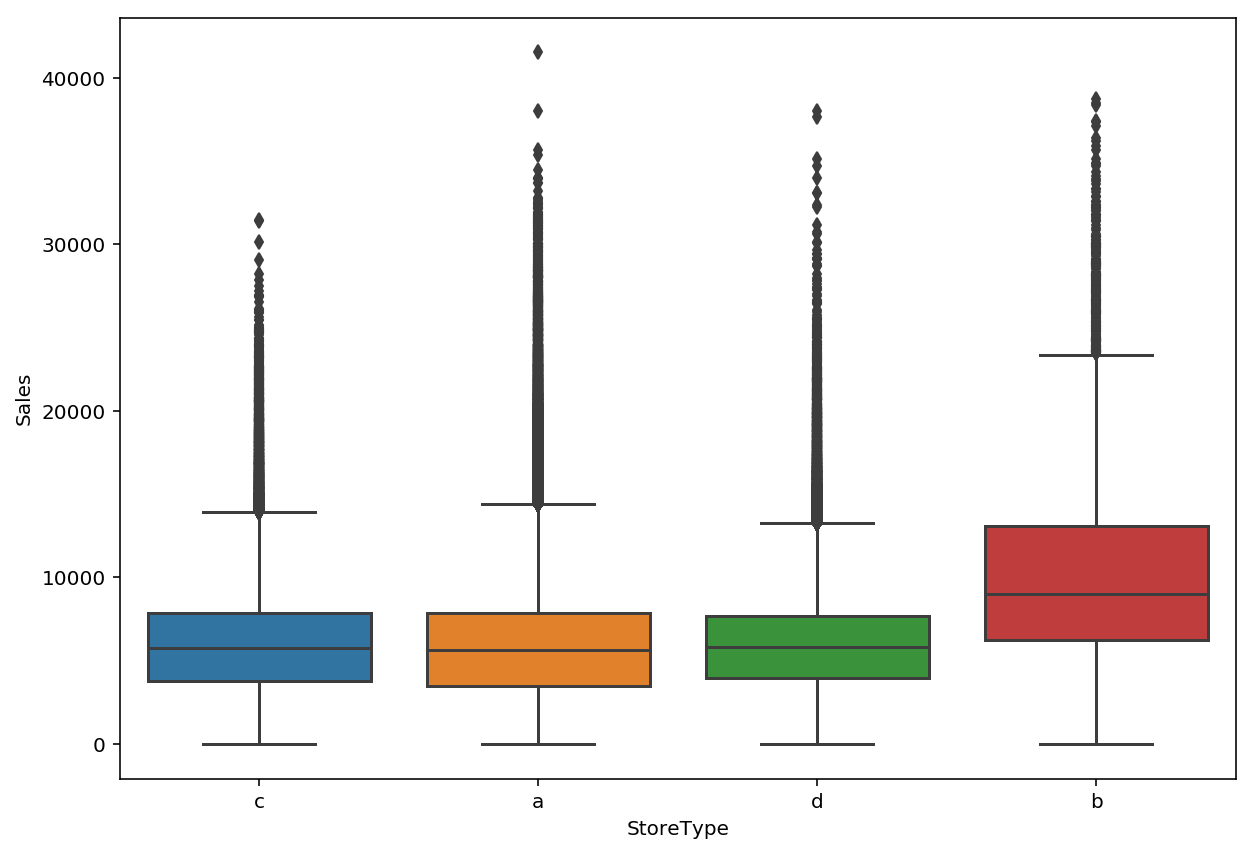

In [640]:
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="StoreType", y="Sales", data=train_store);

    从上面的统计量来看类型A的商店数量>d类型>c类型>b类型,但是平均消费和中位数B类型最多，可以看出其特殊性，接下来我们看看各类型商店的销售总和

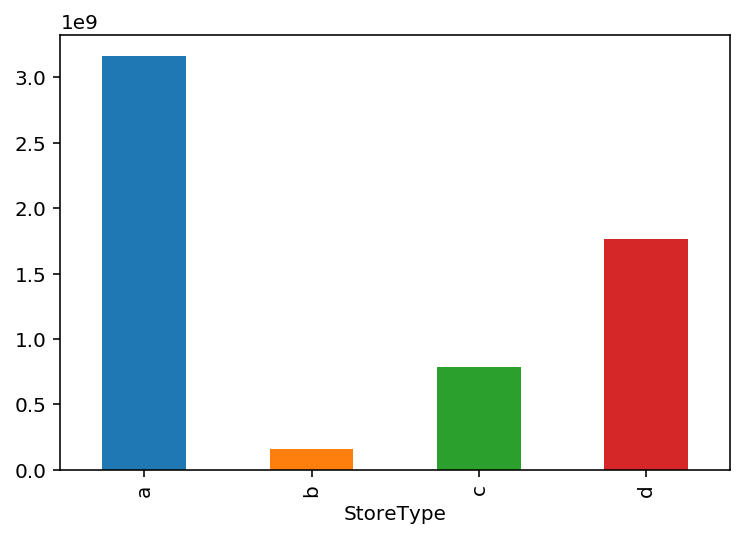

In [641]:
train_store.groupby('StoreType')['Sales'].sum().plot.bar()

    从图形中可以看出拥有模式越多的商店销售总量越高，哪为什么前面的商店类型B拥有更高的单店平均销售额呢？接下来我们结合客户量分析一下。

In [642]:
##商店类型客户统计量
train_store.groupby('StoreType')['Customers'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,659.034880,462.930320,0.0,414.0,647.0,890.0,7388.0
b,15830.0,1987.720846,940.088627,0.0,1228.0,1820.0,2732.0,5494.0
c,136840.0,673.265894,430.708776,0.0,455.0,682.0,924.0,3096.0
d,312912.0,501.434892,292.301770,0.0,375.0,530.0,681.0,2239.0


    从商店类型客户统计量看出B类型商店的客户平均人数是其他三种类型的3倍左右，接下来我们商店类型人均消费统计量

In [643]:
##商店类型人均消费统计量
train_store['PerCapitaConsumption'] = train_store['Sales']/train_store['Customers']
train_store.groupby('StoreType')['PerCapitaConsumption'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457043.0,8.846277,1.690962,0.000000,7.611940,8.631362,9.899435,29.877551
b,15561.0,5.133097,1.254623,0.000000,4.039384,4.986865,6.108364,9.203528
c,112968.0,8.626227,1.694325,3.382542,7.416985,8.424736,9.643063,64.957854
d,258768.0,11.277862,1.990706,4.881279,9.873309,11.194977,12.560328,57.614983


    这里可以看出D类型人均消费的平均数和中位数最高，B类型的人均消费最低。接着我们结合这几个变量综合分析一下

Text(0,0.5,'PerCapitaConsumption')

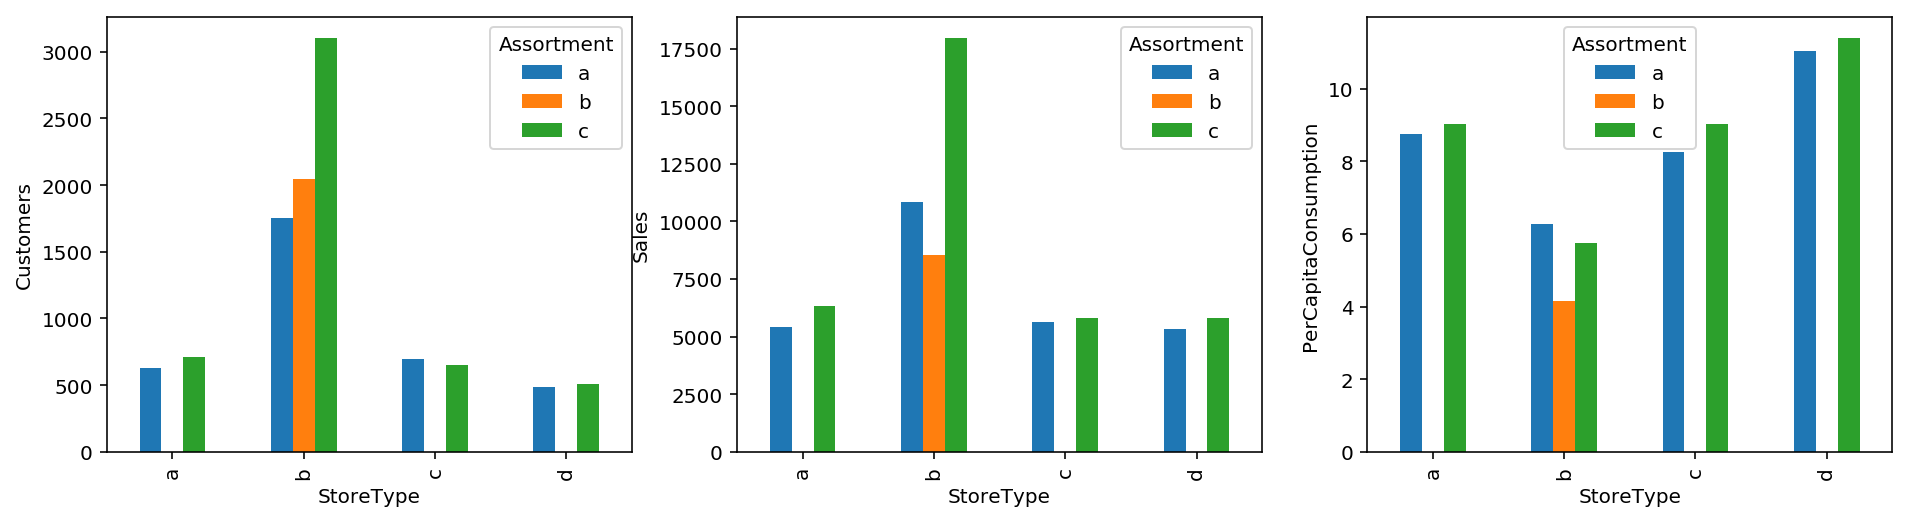

In [644]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
train_store.groupby(['StoreType','Assortment']).mean()['Customers'].unstack().plot(ax=ax[0],kind = 'bar')
train_store.groupby(['StoreType','Assortment']).mean()['Sales'].unstack().plot(ax=ax[1],kind = 'bar')
train_store.groupby(['StoreType','Assortment']).mean()['PerCapitaConsumption'].unstack().plot(ax=ax[2],kind = 'bar')
ax[0].set_ylabel('Customers')
ax[1].set_ylabel('Sales')
ax[2].set_ylabel('PerCapitaConsumption')

    如果我们将Assortment字段理解成a = 只卖基础商品的小店 、b = 还卖拓展性商品的中型店、c = 还卖衍生产品的大型商店，那么从图中可以看出
    
    左1：A、C、D模式的商店都没有中型店，只有卖基础商品的小店还有卖衍生产品的大型商店，客流量最多的是B模式下的大型商店其次是中型店和小型店。其余模式中D模式的人流量最低。
    
    左2：销售额最高的是B模式下的大型商店，其次是B模式下的A型店，其余模式商店销售额都差不多
    
    左3：这里呈现出与左1和左2相反的结果。拥有最高人流量和最高销售额的B模式商店人均消费最低，而在D模式商店相对较低的客户流量和稳定的销售额则拥有较高的人均消费额。
    接下来我们看看各种模式的商店每月销售额有什么变化

### 时间自变量对各模式商店的销售额起了什么作用？

In [645]:
train_store['Date'] = pd.to_datetime(train_store['Date'])
##提取年
train_store['Year']=train_store['Date'].apply(lambda x: x.year)
##提取月
train_store['Month']=train_store['Date'].apply(lambda x: x.month)
##提取天
train_store['Day'] =train_store['Date'].apply(lambda x: x.day)


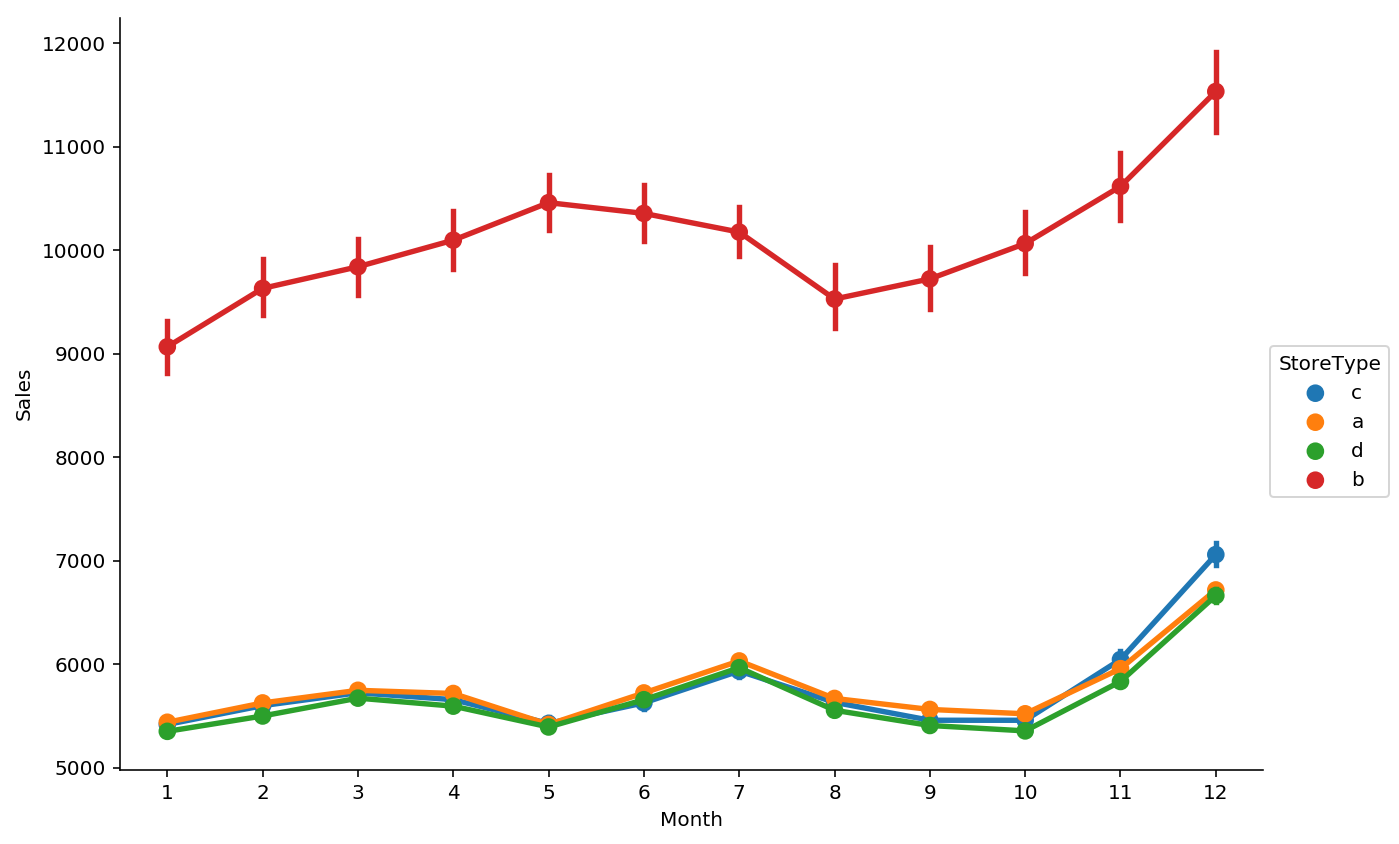

In [646]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales",hue = 'StoreType',size=6,aspect=1.5) 

    A、C、D类型的商户起伏点都比较类似都是在1、5、、10月有个低点并且都是随后的2个月内到达一个局部高峰并再次下降，在10-12月期间增长比较明显，而B类型的商户阶段性低点是在1月还有8月随后销售额一路增长至12月到达阶段性高峰。接下来我们看看‘DayOfWeek’这个变量起了什么作用。

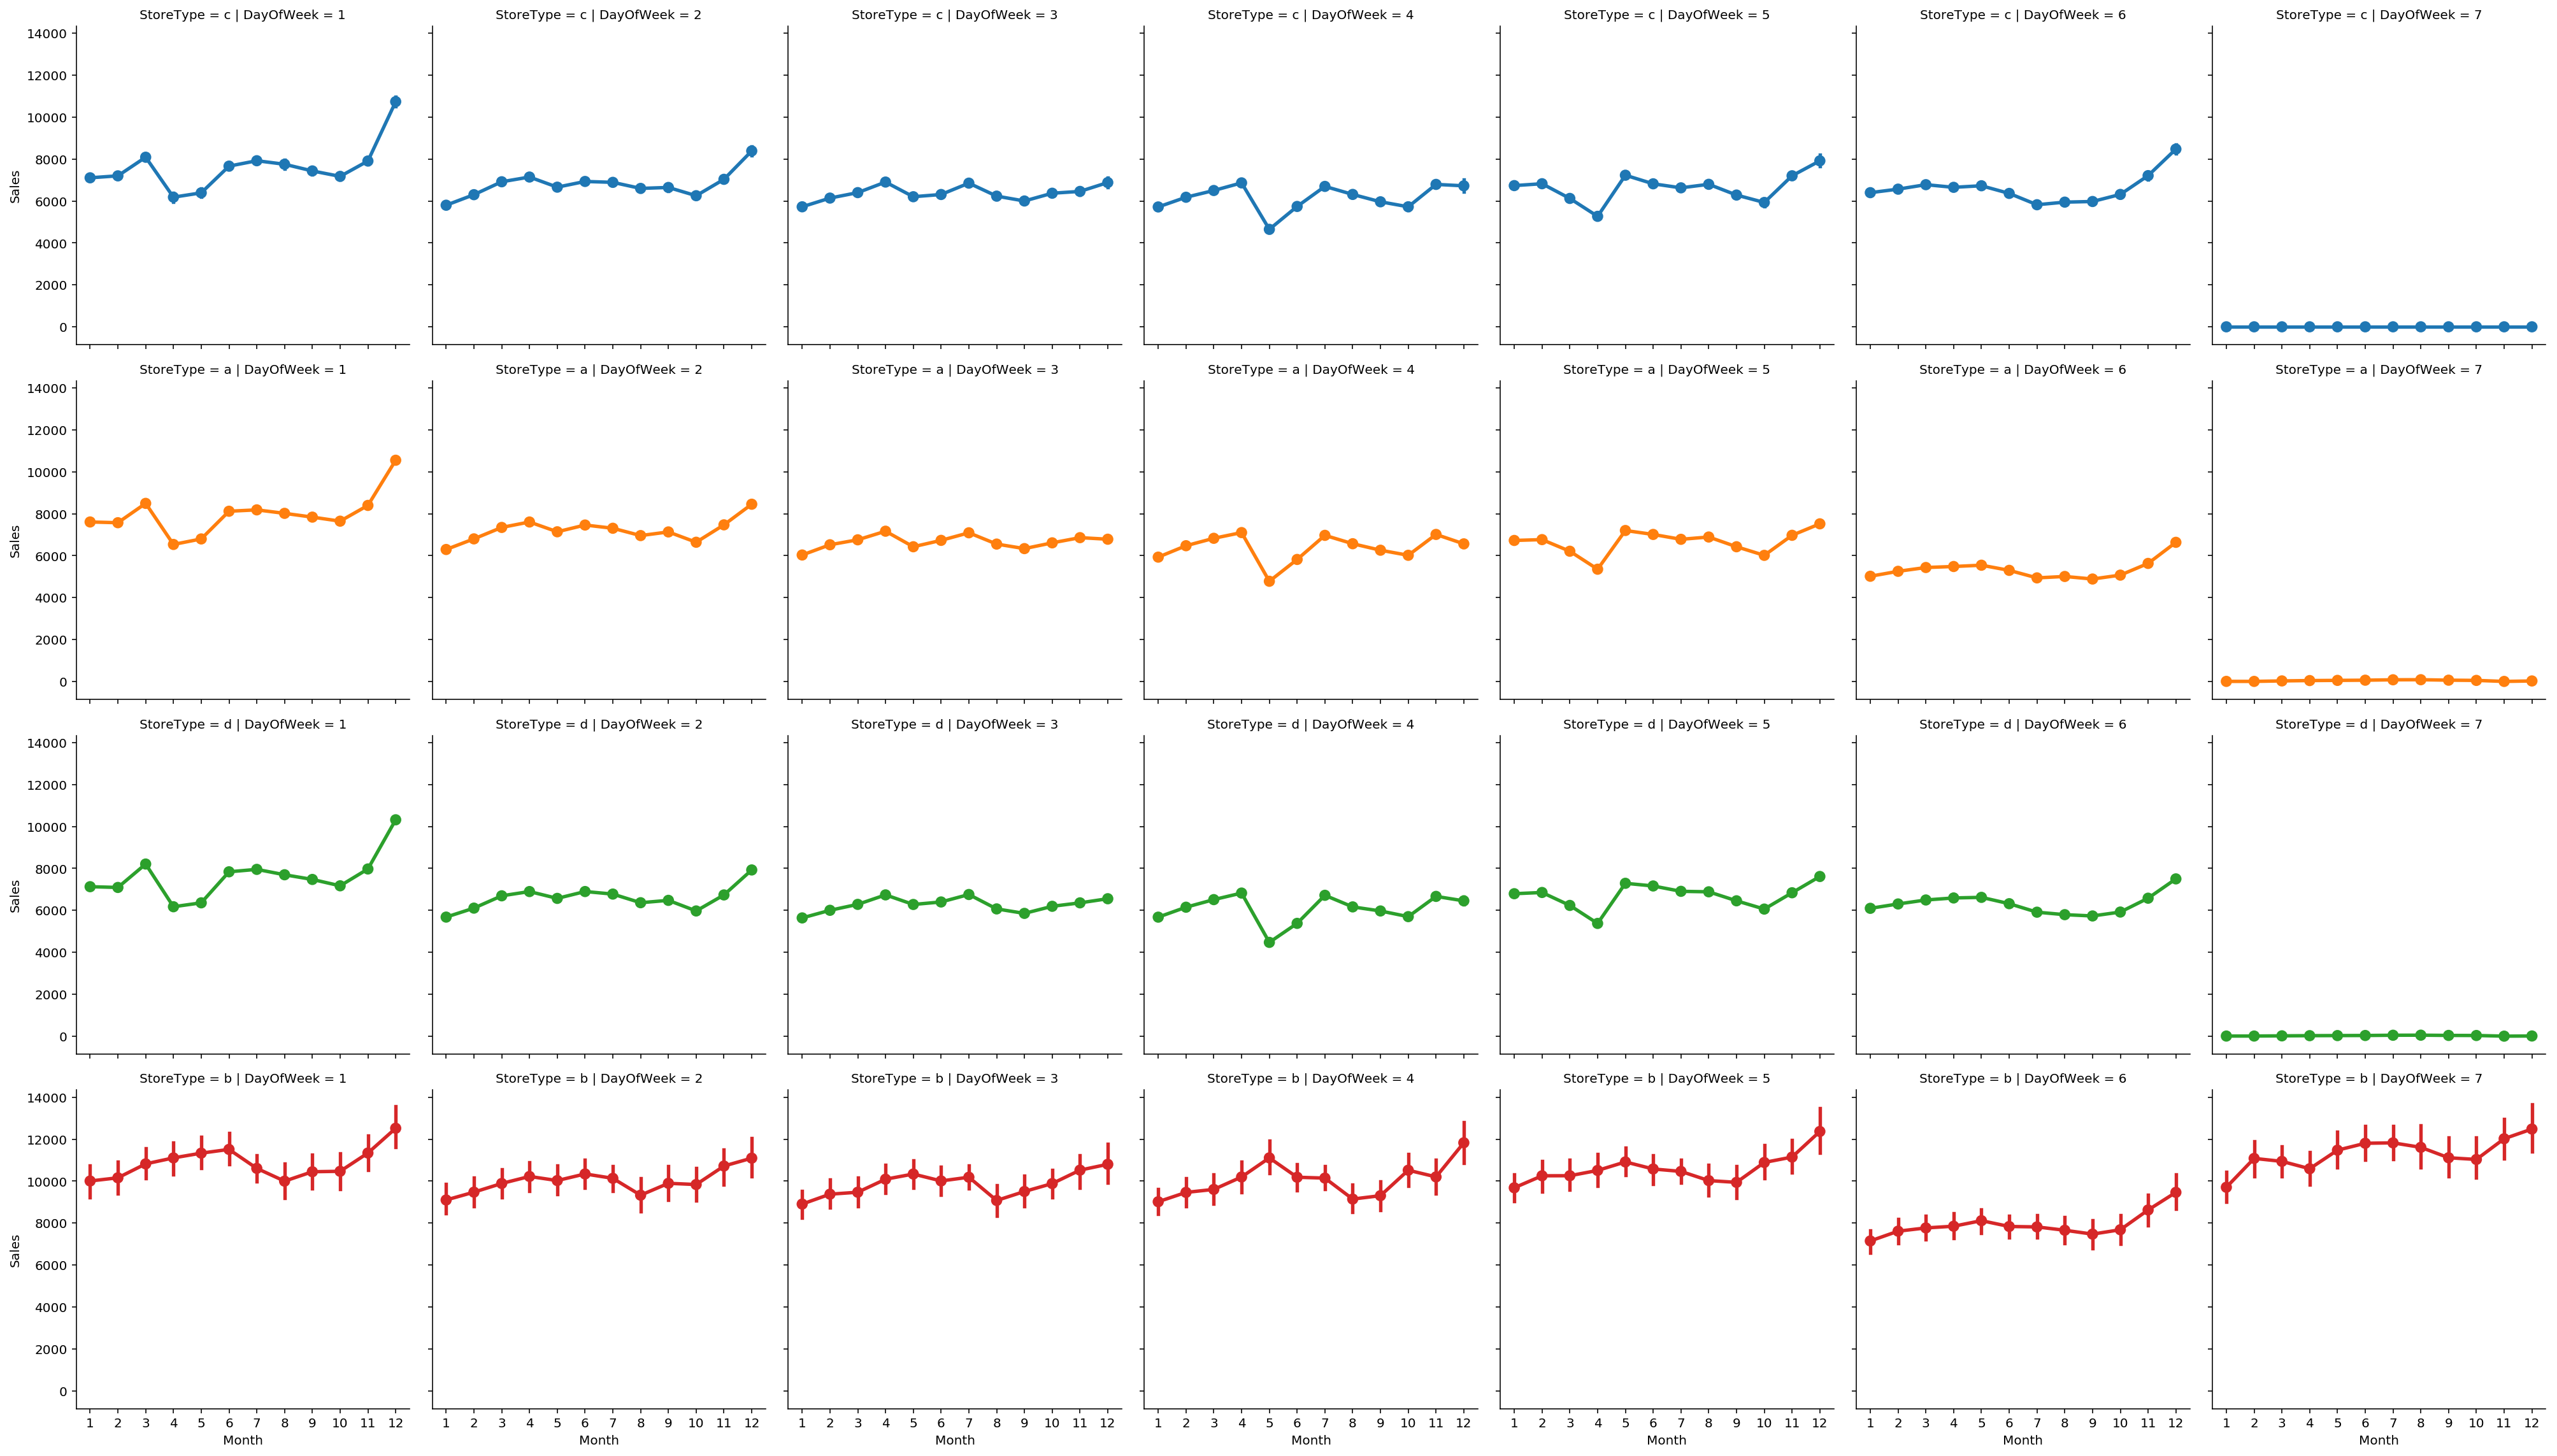

In [647]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", col = 'DayOfWeek',hue = 'StoreType',row = 'StoreType')

    从这里可以看出12月每个周日C、A，D类型的商店都会进行休息，放假后的一天的销售额都有提高，是不是所有都是这样呢，我们继续探索。

### 各模式商店重新开店的第一天销售额都有增长吗？

In [648]:
### 数据处理将放假后重新开店打上标签
store_id_arrays = train_store.drop_duplicates(['Store'])['Store']
index_arrays = []
for store_id in store_id_arrays :
    
    train_store_type = train_store[train_store['Store'] == store_id].sort_values(['Date'])
    base_close = train_store_type[train_store_type.Open == 0].index
    base_open = train_store_type[train_store_type.Open == 1].index
    ##求闭店的前一天和后一天索引
    offset_close = pd.Index(base_close - 1)
    #求交集offset_close与开店索引的交集
    intersection_close =list(set(base_close.tolist()).intersection(set(offset_close.tolist())))
    ##求差集
    difference_close = list(set(offset_close.tolist()).difference(set(intersection_close)))
    
    if len(difference_close)>0:
        index_arrays+=difference_close
        
        
index_arrays.sort()
afterDayDF = train_store.reindex(index_arrays)
afterDayDF['CloseafterDay'] = True
columns = afterDayDF['CloseafterDay']
train_store = pd.concat([train_store,columns],axis=1)
##将NAN填充为0
train_store['CloseafterDay'].fillna(False,inplace = True)

In [649]:
train_store[train_store.CloseafterDay == 1].groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,88561.0,8190.053918,3796.777980,0.0,5506.00,7408.0,10057.0,41551.0
b,7.0,5388.857143,5232.257207,0.0,0.00,7158.0,9502.5,11559.0
c,22165.0,7968.760614,3436.787780,0.0,5422.00,7411.0,9839.0,31415.0
d,50900.0,7908.618487,3214.259451,0.0,5530.75,7397.5,9721.0,38037.0


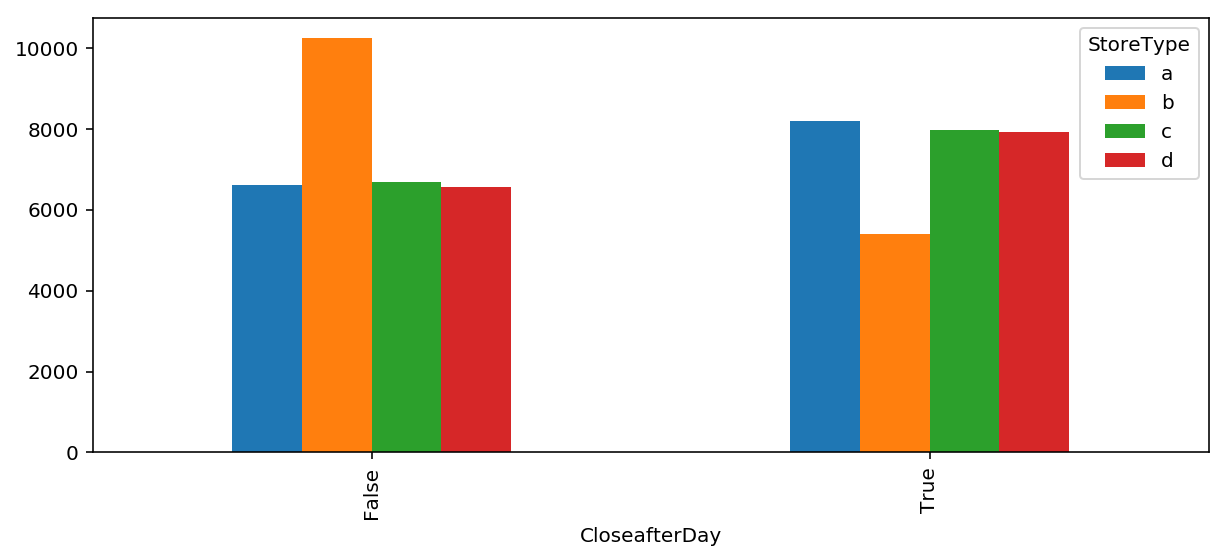

In [650]:
fig, ax = plt.subplots(figsize=(10,4))

train_store[train_store.Open == 1].groupby(['CloseafterDay','StoreType']).mean()['Sales'].unstack().plot(ax=ax,kind = 'bar')

    从图形和统计量看出A、C、D类型的商店闭店后重新开放的第一天销售量都有一定增长，但B类型的商店销售额却大幅度下降。同时在查看重新开店的第一天统计量时发现 MIN = 0，这意味着即使在开店的情况下存在0销售额的情况。我们继续探索看看造成B类型商店销售额大幅下降是不是因为存在0销售额造成的。

Text(0,0.5,'Customers')

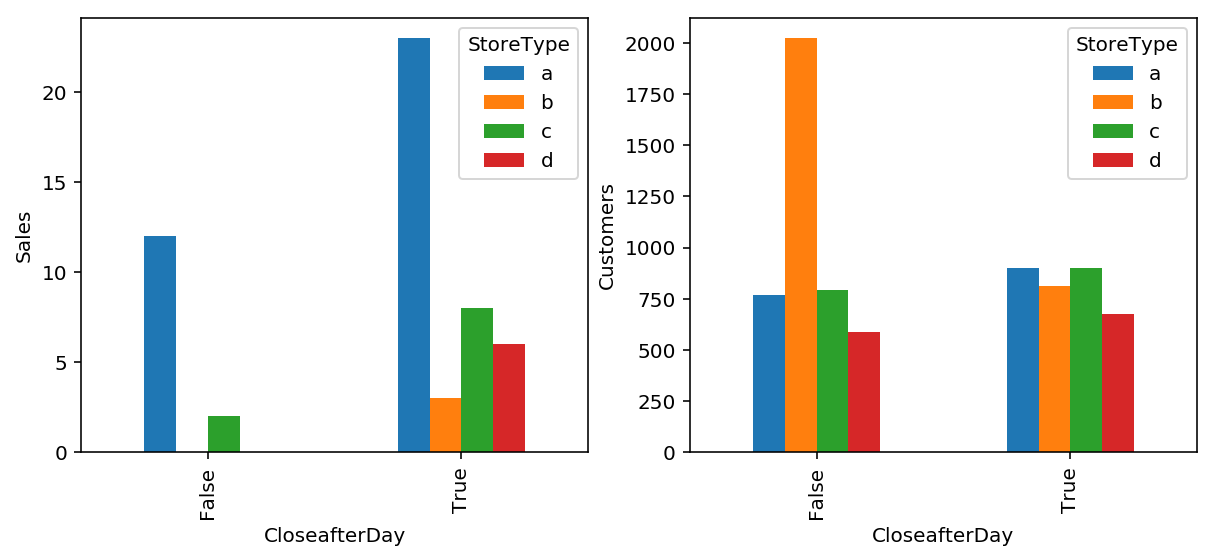

In [651]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
##左图
train_store[(train_store.Open != 0) & (train_store.Sales ==0) ].groupby(['CloseafterDay','StoreType'])['Sales'].count().unstack().plot(ax=ax[0],kind = 'bar')
##右图
train_store[train_store.Open == 1].groupby(['CloseafterDay','StoreType']).mean()['Customers'].unstack().plot(ax=ax[1],kind = 'bar')
ax[0].set_ylabel('Sales')
ax[1].set_ylabel('Customers')

    从左图中可以看出B类型商店存在销售额为0的情况都是发生在放假前一天,这应该是原因之一，接着从右图中可以看出B类型的客流量大概减少了50%而A、C、D客流量都微量增长，如果假设客流量的减少直接影响到营业额，哪什么才会直接影响客流量呢？

Text(0,0.5,'Customers')

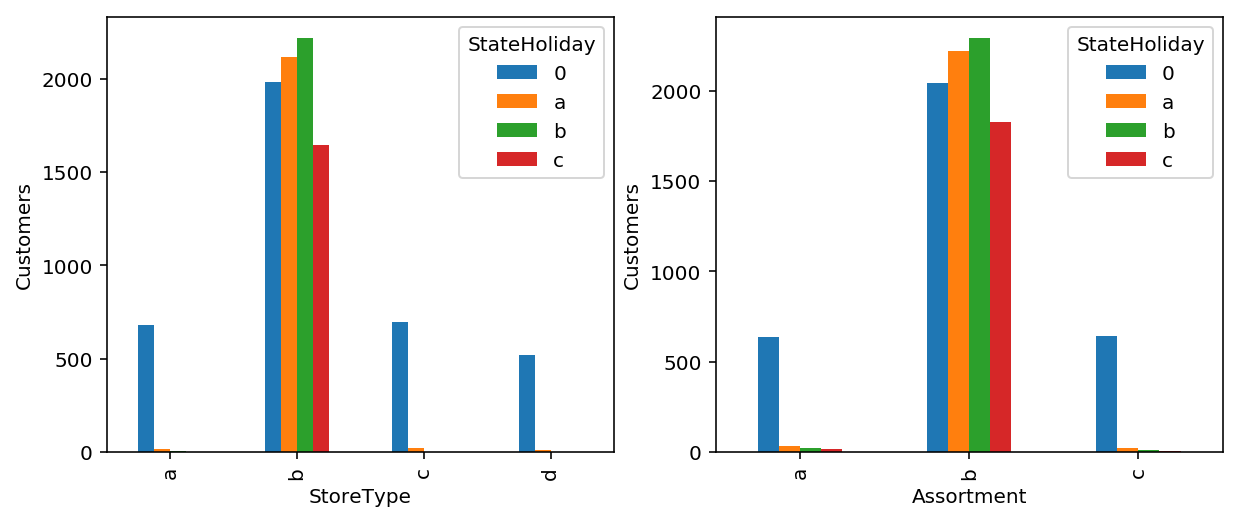

In [652]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
##左图
train_store.groupby(['StoreType','StateHoliday']).mean()['Customers'].unstack().plot(ax=ax[0],kind = 'bar')
##右图
train_store.groupby(['Assortment','StateHoliday']).mean()['Customers'].unstack().plot(ax=ax[1],kind = 'bar')
ax[0].set_ylabel('Customers')
ax[1].set_ylabel('Customers')

     我们从图中可以看出一旦遇到公众假期、复活节假期B类型的商店客流量都有所提高，而其他类型的几乎都没有客流量，可能是因为A、C、D模式的商店大部分在公众假期都放假。这里或许可以解释为什么B模式在假期后重新开店的营业额会不升反降，因为放假期间大量客户流量选择去B模式商店，导致需求集中消化，而A、C、D模式的商店在公众假期都放假需求被集中，所以B呈现出与A、C、D相反的规律。


### 促销是否会影响销量？

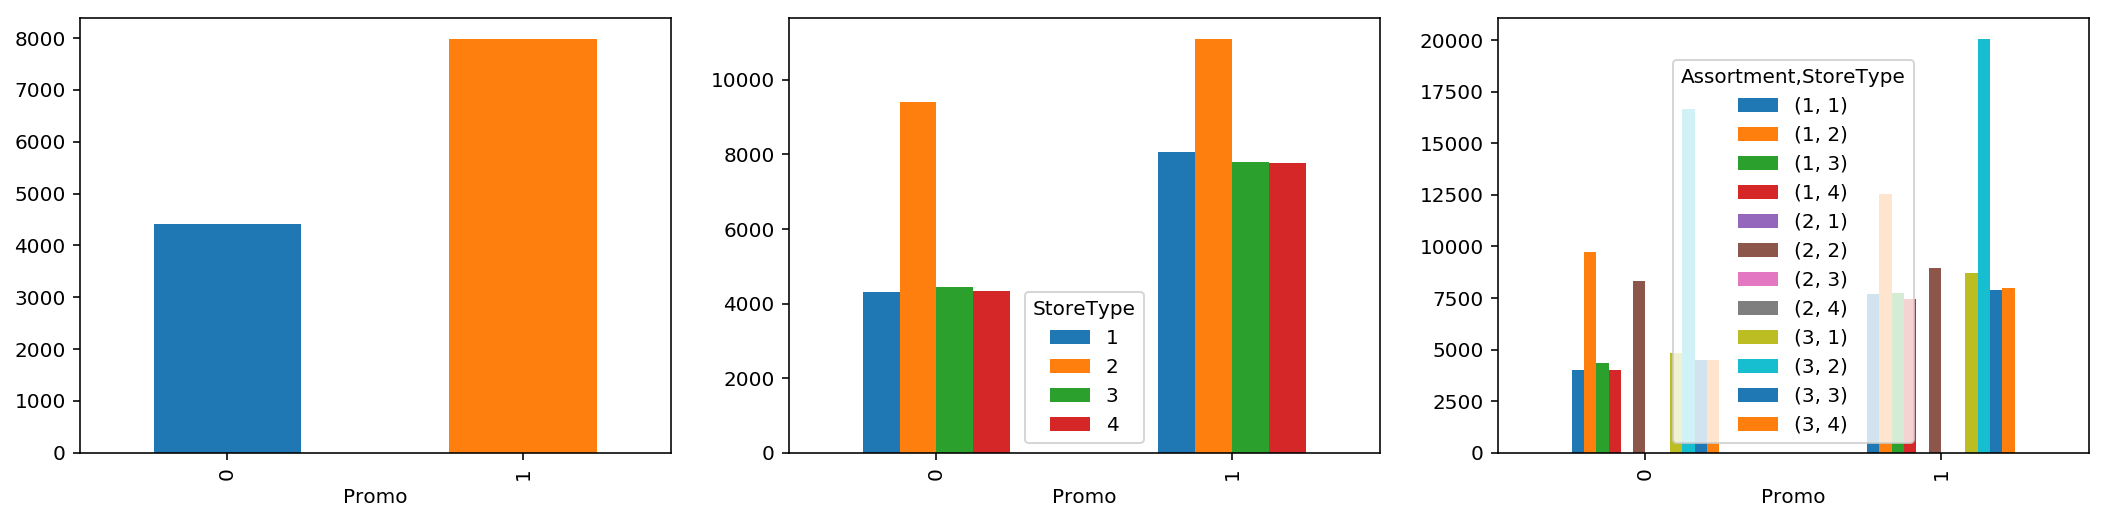

In [276]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
train_store.groupby('Promo')['Sales'].mean().plot(ax = ax[0],kind = 'bar')
train_store.groupby(['Promo','StoreType'])['Sales'].mean().unstack().plot(ax =ax[1],kind = 'bar')
train_store.groupby(['Promo','StoreType','Assortment'])['Sales'].mean().unstack().unstack().plot(ax=ax[2],kind = 'bar')

    我们简单的对比了一下销售额，发现促销确实会增加销售额，从图形上观察幅度大概在增幅大概在90%左右。接下来看看促销是否会提高人均消费额。

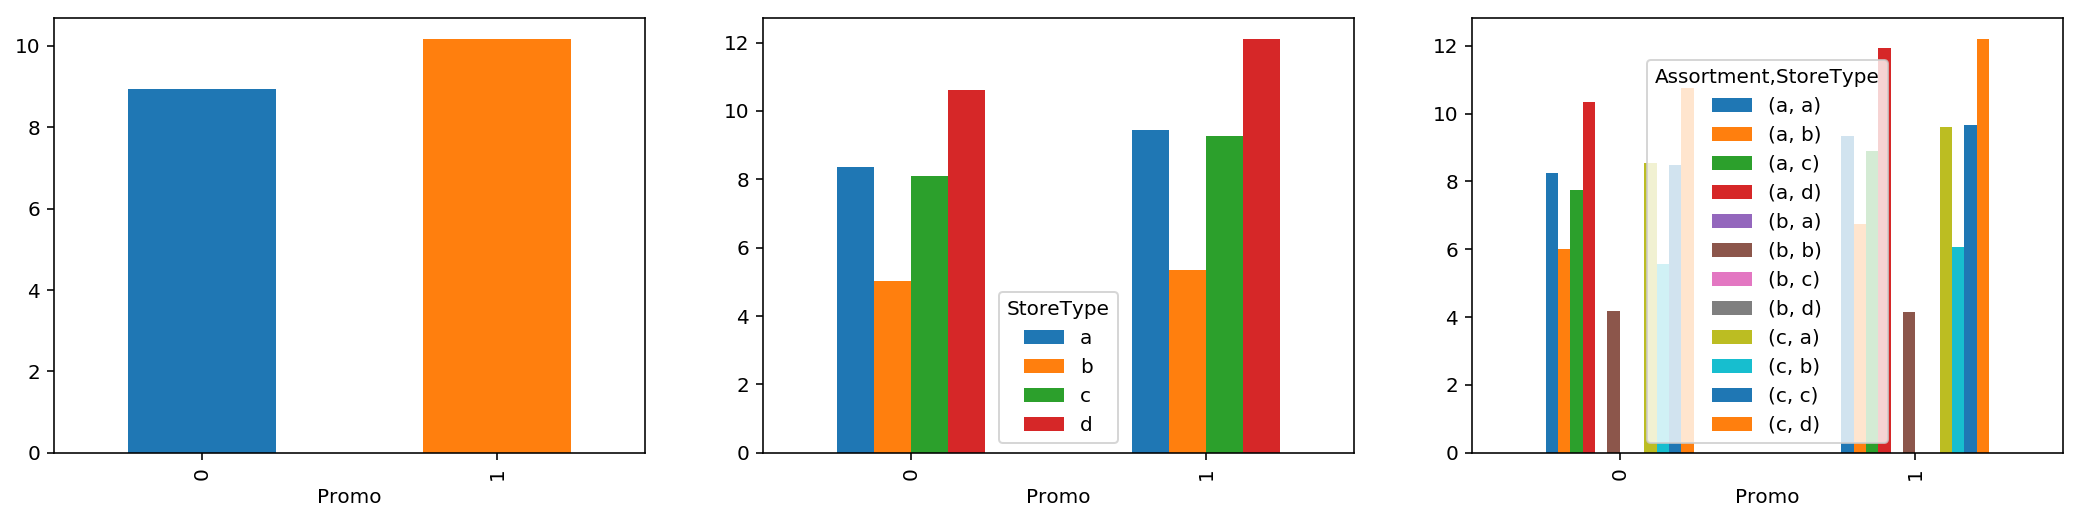

In [654]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
train_store.groupby('Promo')['PerCapitaConsumption'].mean().plot(ax = ax[0],kind = 'bar')
train_store.groupby(['Promo','StoreType'])['PerCapitaConsumption'].mean().unstack().plot(ax =ax[1],kind = 'bar')
train_store.groupby(['Promo','StoreType','Assortment'])['PerCapitaConsumption'].mean().unstack().unstack().plot(ax=ax[2],kind = 'bar')

    从图形大致观察，促销提高人均消费额度大概在1-2美元之间。接下来按照同样的方式看看参与连续促销与不参与的商店平时销售额对比情况。

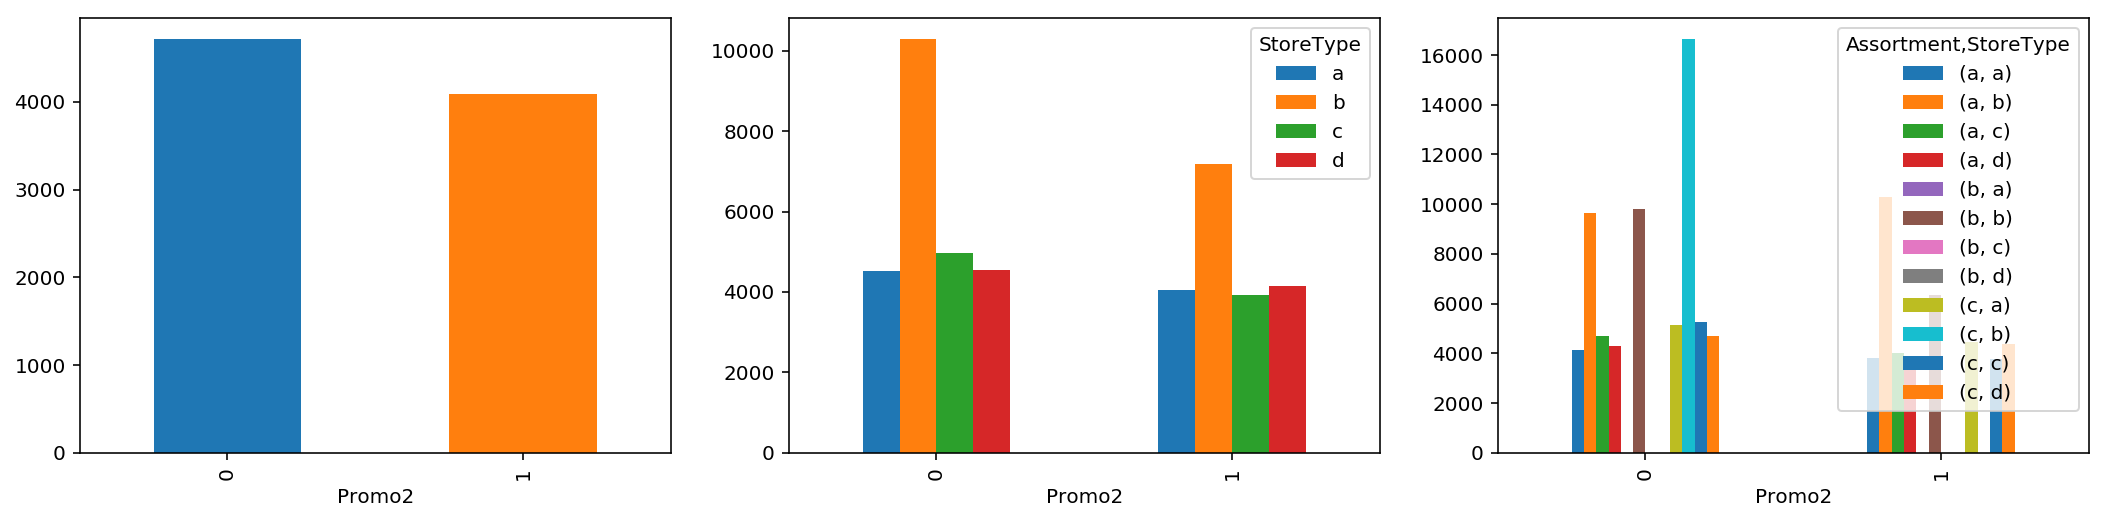

In [655]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
train_store[train_store['Promo'] == 0].groupby('Promo2')['Sales'].mean().plot(ax =ax[0],kind = 'bar')
train_store[train_store['Promo'] == 0].groupby(['Promo2','StoreType'])['Sales'].mean().unstack().plot(ax =ax[1],kind = 'bar')
train_store[train_store['Promo'] == 0].groupby(['Promo2','StoreType','Assortment'])['Sales'].mean().unstack().unstack().plot(ax =ax[2],kind = 'bar')

    从上面的对比图可知，对于参加连续性促销的店平时销售额都要略低于不参加连续性促销的店。

### 附近存在竞争对手会不会影响销售额？

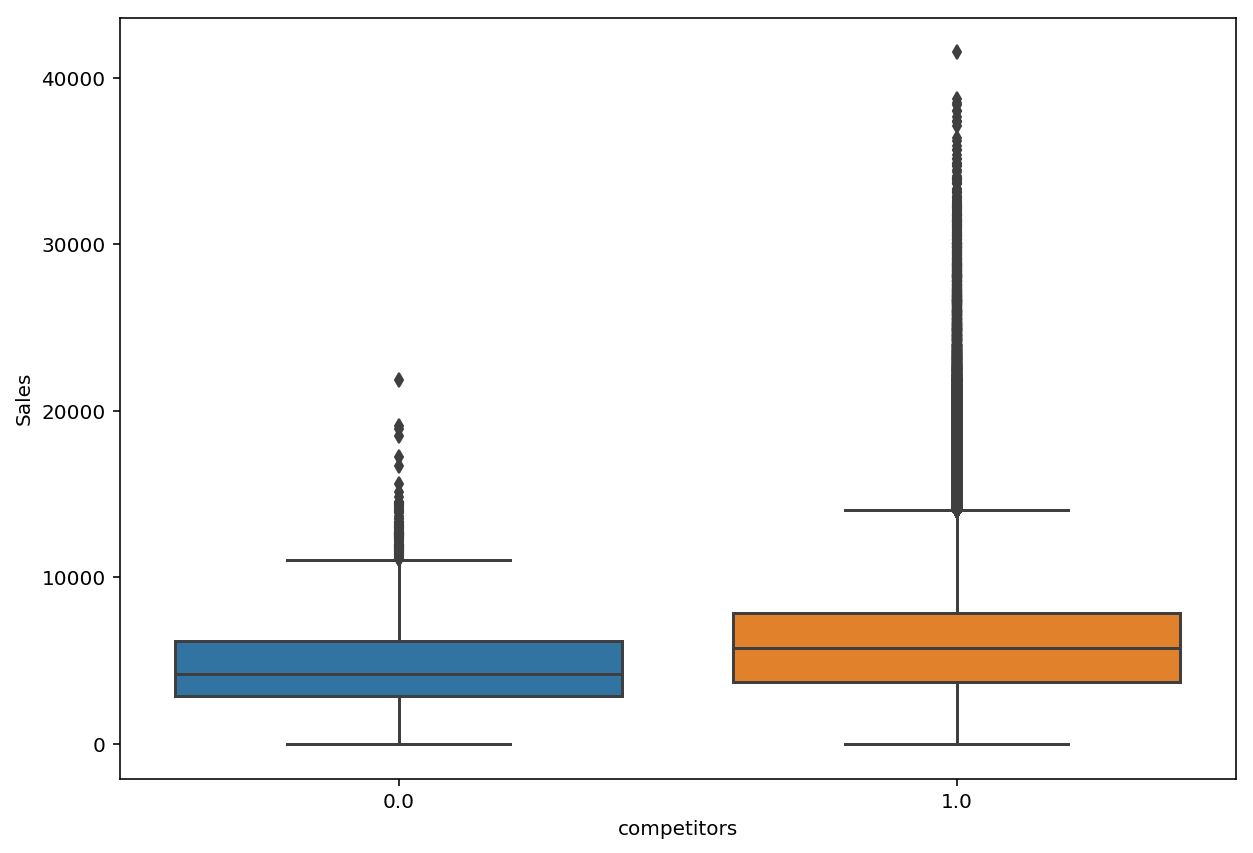

In [656]:
# train_store.CompetitionDistance.astype(np.string_)
train_store['CompetitionDistance'].fillna(0,inplace = True)
mask =(train_store['CompetitionDistance'] != 0)
train_store.loc[mask,'CompetitionDistance'] = 1
train_store.rename(columns={'CompetitionDistance':'competitors'}, inplace=True) 
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="competitors", y="Sales", data=train_store)

   我们将‘CompetitionDistance’有缺省值的设置为没竞争对手，没缺省值的设置为有竞争对手，通过箱形图观察发现有竞争对手的销售额异常值较多，并且销售额中位数也比没竞争对手高，我们可以理解为有竞争对手的店地理位置或者人群集中度都有一定优势，导致销售额比其他店都高，接着我们对比一下竞争对手开业前和开业后的业绩表现。

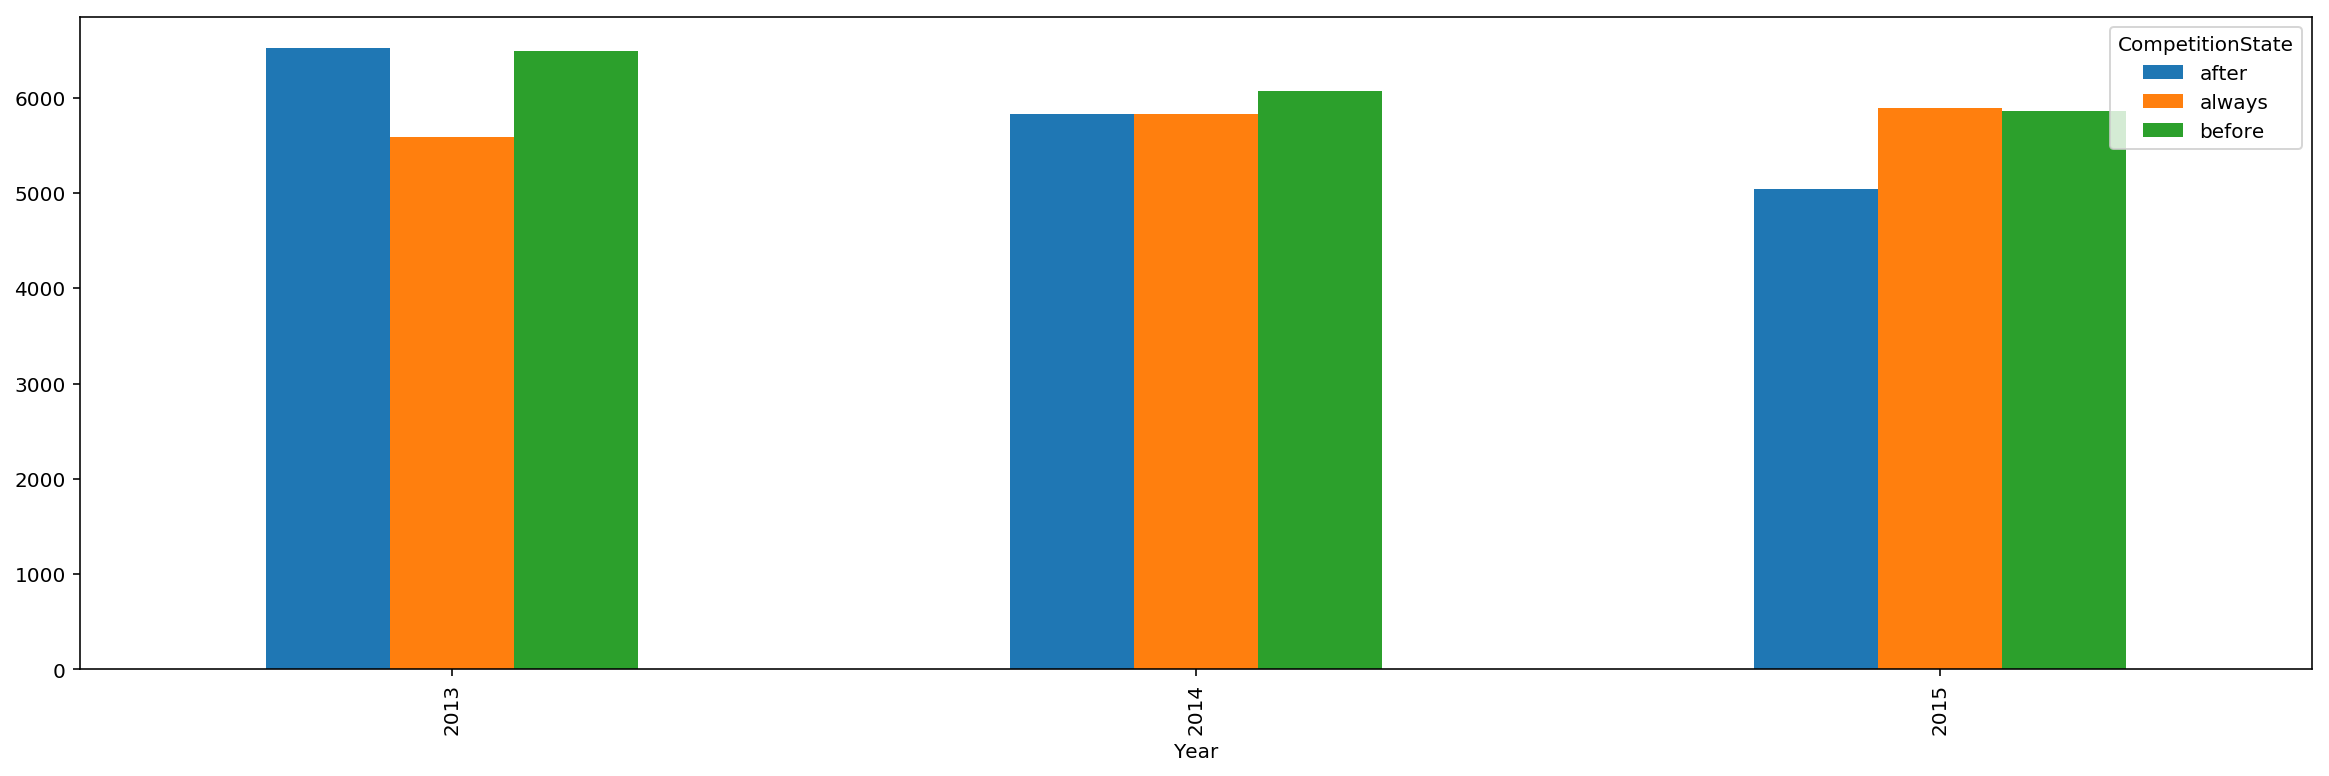

In [657]:
mask1 =(train_store['CompetitionOpenSinceYear'] == train_store['Year']) & \
            (train_store['Month'] >= train_store['CompetitionOpenSinceMonth'])
    
train_store.loc[mask1,'CompetitionState'] = 'after'

mask2 =(train_store['CompetitionOpenSinceYear'] == train_store['Year']) & \
            (train_store['Month'] < train_store['CompetitionOpenSinceMonth'])
train_store.loc[mask2,'CompetitionState'] = 'before'

train_store['CompetitionState'].fillna('always',inplace = True)

fig,axes_salaries = plt.subplots(figsize=(20,6))
train_store.groupby(['Year','CompetitionState'])['Sales'].mean().unstack().plot.bar(ax =axes_salaries,legend = True)

    通过对竞争对手开业前后的销售额对比发现2013年基本没什么影响，2014年竞争对手开业后业绩降幅大概是5%而到了2015年竞争对手开业后业绩降幅大概在15%左右。

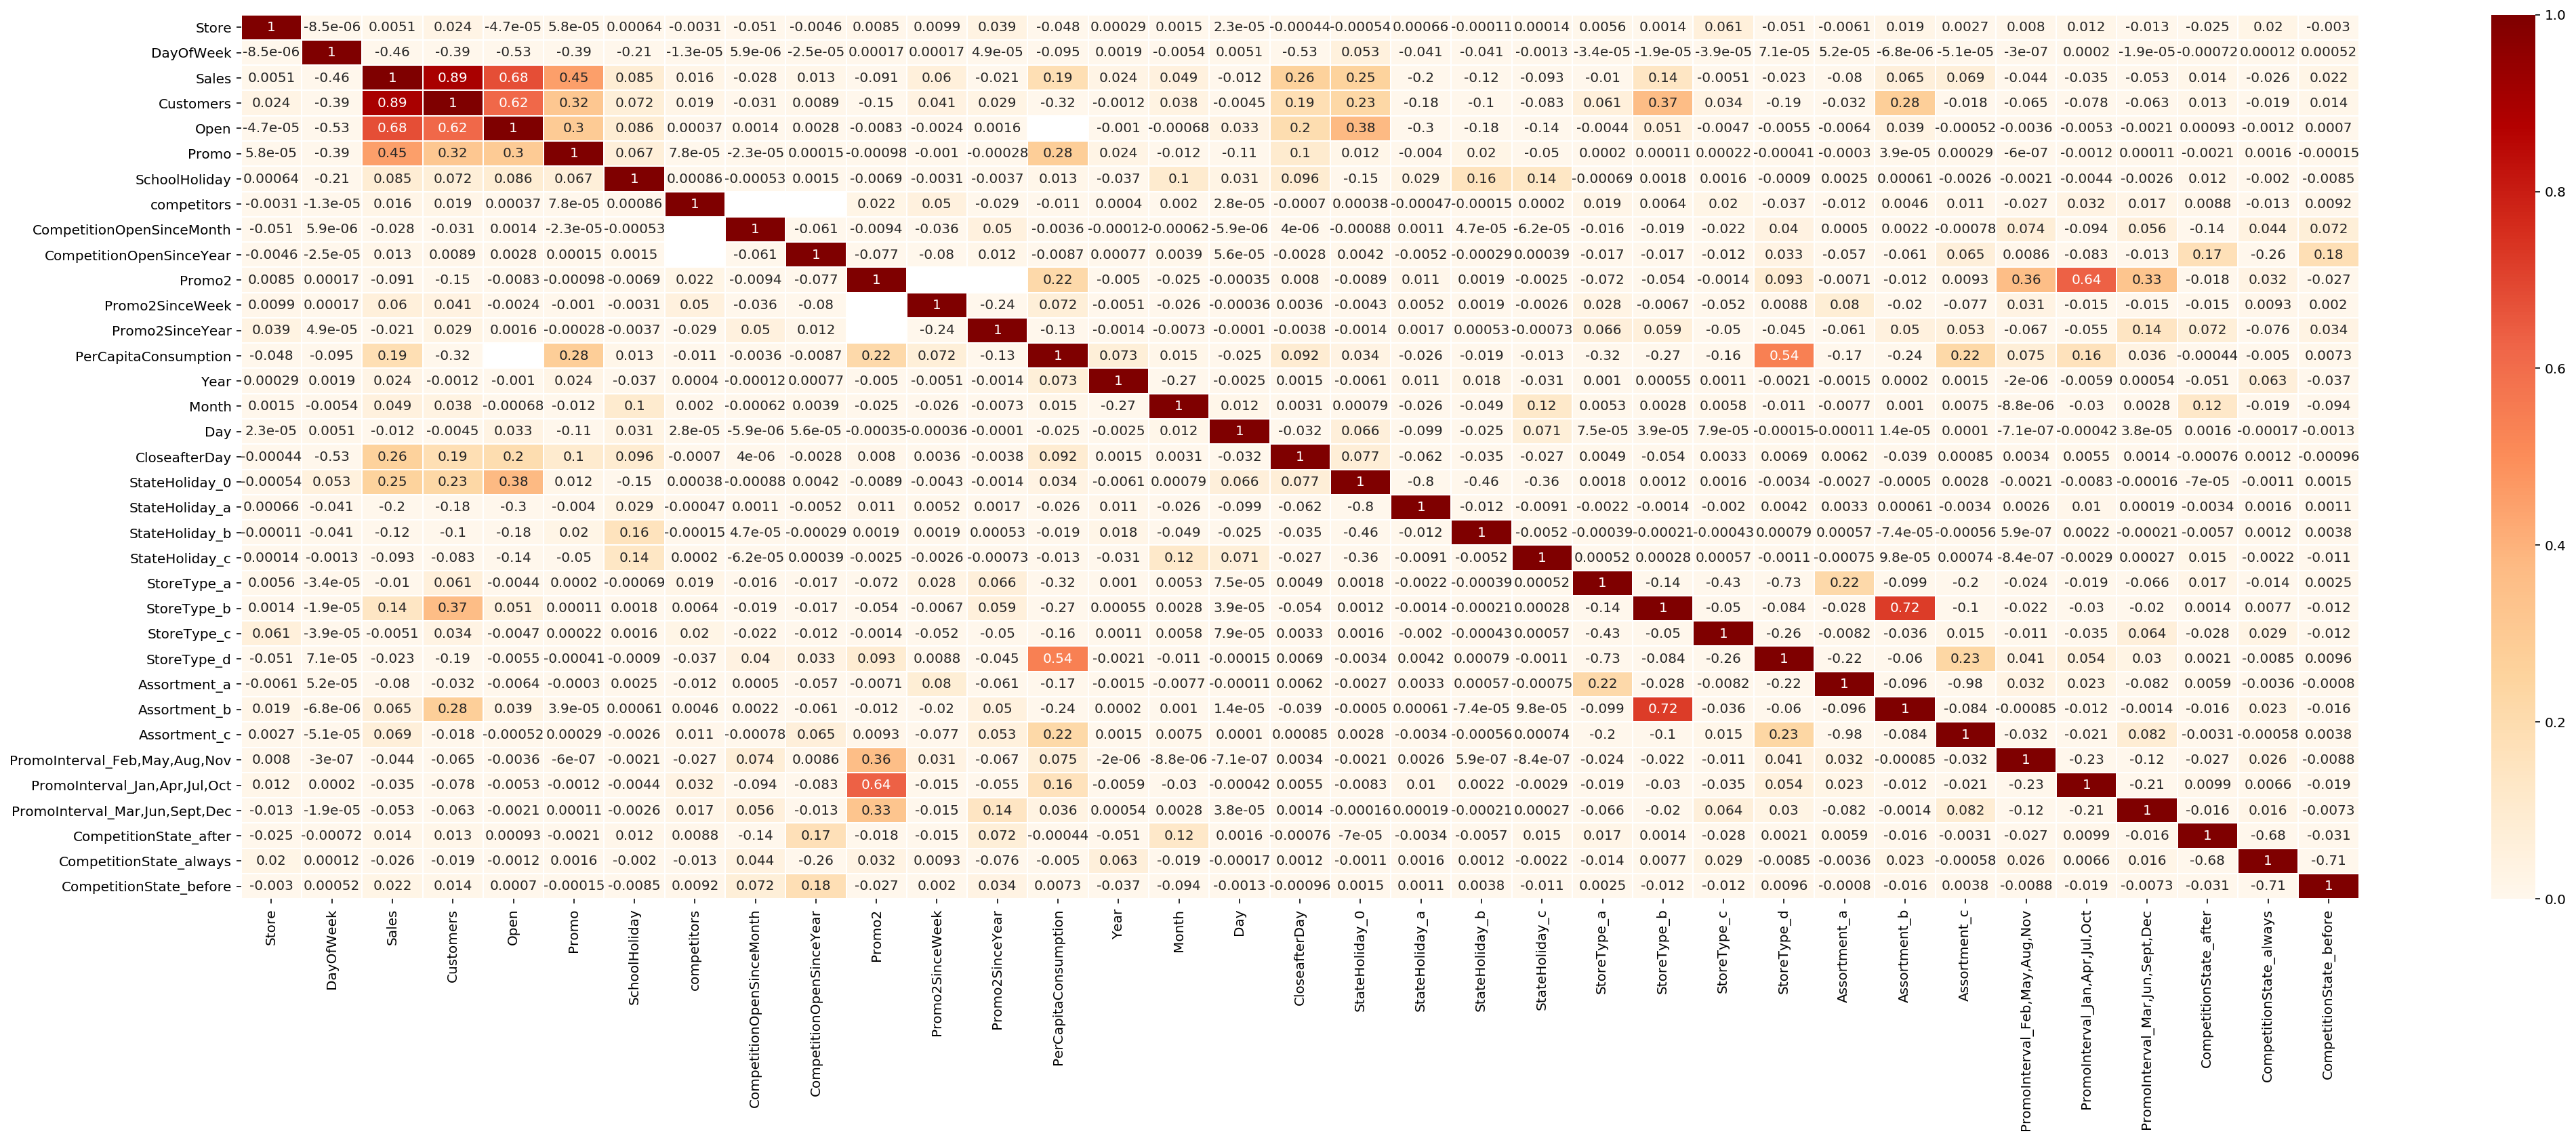

In [658]:
train_store_features = pd.get_dummies(train_store)
train_store_encoded = list(train_store_features.columns)
plt.figure(figsize=(35,12))
g = sns.heatmap(train_store_features[train_store_encoded].corr(),vmin=0,vmax=1,linewidths=.5,cmap="OrRd",annot=True)

    从热力图中我们没发现多重共线性问题，最后我们做个多元回归结束探索性分析部分。

### 结论
    1.商店的规模对于销售额有较大的影响。
    2.销售额受季节性影响
    3.促销会对销售额有较大的提升
    4.节假日对于B模式的商店来说会对销售额有较大的提升，但在节后的第一天里A、C、D模式的商店销售额会有一定提升
    5.竞争对手从2014年开始对销售额逐渐有了一定影响。
    
#### 缺陷说明
##### 1：在分析过程中暂时未处理缺省值和异常值
##### 2：在竞争对手的问题处理上未消除时间对于销售额的影响。例如可能存在销售淡季和销售旺季对比的情况
##### 3：在此次分析中大部分结论都是基于相关性和统计量，不具有因果性。

### 数据统一处理

In [5]:
from sklearn.preprocessing import LabelEncoder,Imputer,StandardScaler,StandardScaler,FunctionTransformer,OneHotEncoder
import numpy as np
import pandas as pd
import xgboost as xgb
import visuals_v2 as vs


from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,train_test_split,TimeSeriesSplit
import scipy

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn import cross_validation
import itertools
from sklearn.metrics import r2_score


/home/fedora/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
train = pd.read_csv('train.csv',low_memory=False)
test = pd.read_csv('test.csv',low_memory=False)
store = pd.read_csv('store.csv',low_memory=False)
train_store = pd.merge(train, store, how = 'left', on = 'Store')
test_store = pd.merge(test, store, how = 'left', on = 'Store')
train_store = train_store[train_store.Sales !=0]
test_store['Open'].fillna(1,inplace = True)

In [58]:
##格式化日期
def subTime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['DayOfWeek'] = df.Date.dt.dayofweek
    df['WeekOfYear'] = df.Date.dt.weekofyear
    df['DayOfYear'] = df.Date.dt.dayofyear
    return df

##将PromoInterval字段转换成当月是否进行连续促销‘IsPromoMonth’
def initPromoInterval(data):
    data['PromoInterval'].fillna('',inplace = True)
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
    #drop intermediate steps for memory sake
    data.drop('monthStr', axis=1, inplace=True)
    data.drop('PromoInterval', axis=1, inplace=True)
    return data


##将CompetitionOpenSinceYear、CompetitionOpenSinceMonth 转化成‘CompetitionOpen’当前日期竞争对手是否已经开业
##将Promo2SinceYear、Promo2SinceWeek 转化成当前日期持续促销了多久
def addCompetitionOpenSinceYear(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + \
        (df.Month - df.CompetitionOpenSinceMonth)
    df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + \
        (df.WeekOfYear - df.Promo2SinceWeek) / 4.0
    df['PromoOpen'] = df.PromoOpen.apply(lambda x: x if x > 0 else 0)
    df.loc[df.Promo2SinceYear == 0, 'PromoOpen'] = 0
    
    
    df['CompetitionOpen'].fillna(0,inplace = True)
    df.drop(['CompetitionOpenSinceMonth'],axis=1,inplace = True)
    df.drop(['CompetitionOpenSinceYear'],axis=1,inplace = True)
    df.drop(['Promo2SinceYear'],axis=1,inplace = True)
    df.drop(['Promo2SinceWeek'],axis=1,inplace = True)
    
    return df

## 将销售低的月份和星期进行标记
def addHightLowSalesOfTime(df):
    df['LowSalesOfWeek'] = 0
    mask = (df.Month == 4 )  | (df.Month == 5) & (df.DayOfWeek == 1) & (df.StoreType != 'b')
    df.loc[mask,'LowSalesOfWeek'] = 1
    mask1 = ((df.Month == 5) & (df.DayOfWeek == 4) & (df.StoreType != 'b'))
    df.loc[mask,'LowSalesOfWeek'] = 1
    mask1 = ((df.Month == 4) & (df.DayOfWeek == 5) & (df.StoreType != 'b'))
    df.loc[mask,'LowSalesOfWeek'] = 1
    
    df['LowSalesOfMonth'] = 0
    
    mask = (df['Month'] == 1 ) | (df['Month'] == 5) | (df['Month'] == 10) & (df['StoreType'] != 'b')
    df.loc[mask,'LowSalesOfMonth'] = 1
    mask = (df['Month'] == 1 ) | (df['Month'] == 8) & (df['StoreType'] == 'b')
    df.loc[mask,'LowSalesOfMonth'] = 1
    df.loc
    return df

## 用DayOfWeek为分组生成销售的标准差
def addSalesStd(train_df,test_df):
     
    stdOfWeek = train_df.groupby(['DayOfWeek','Store'])['Sales'].std()
    train_df = pd.merge(train_df, stdOfWeek.reset_index(name='StdOfWeek'), how='left', on=['Store','DayOfWeek'])
    test_df = pd.merge(test_df, stdOfWeek.reset_index(name='StdOfWeek'), how='left', on=['Store','DayOfWeek'])
    
    return train_df,test_df



## 生成每家店铺的平均销售额和平均人流量
def addSalesFeatures(train_df,test_df):
    df_sales = train_df.groupby([train_df['Store']])['Sales'].sum()
    df_customers = train_df.groupby([train_df['Store']])['Customers'].sum()
    df_open = train_df.groupby([train_df['Store']])['Open'].count()
    
    df_sales_per_day = df_sales / df_open
    df_customers_per_day = df_customers / df_open
    
    train_df = pd.merge(train_df, df_sales_per_day.reset_index(name='SalesPerDay'), how='left', on=['Store'])
    train_df = pd.merge(train_df, df_customers_per_day.reset_index(name='CustomersPerDay'), how='left', on=['Store'])
    test_df = pd.merge(test_df, df_sales_per_day.reset_index(name='SalesPerDay'), how='left', on=['Store'])
    test_df = pd.merge(test_df, df_customers_per_day.reset_index(name='CustomersPerDay'), how='left', on=['Store'])
    
    return train_df,test_df


##将重新装修的商店进行标记
def addReOpenDate(train_store,test_store):
    decorate = (train_store.groupby('Store')['Open'].count()<942).reset_index(name='decorate')
    decorate_store =decorate['Store']
    train_store = pd.merge(train_store, decorate, how='left', on=['Store'])
    test_store = pd.merge(test_store, decorate, how='left', on=['Store'])
    decorate_store = decorate[decorate.decorate ==True]['Store']
    open_date_index = []
    for store in decorate_store:
        index = train_store[train_store.Store == store]['Date'].diff(periods=1).argmin()
        open_date_index.append(index)
    
    train_store.loc[open_date_index,'ReOpenDate'] = 1
    train_store['ReOpenDate'].fillna(0,inplace = True)
    test_store['ReOpenDate'] = 0
    return train_store,test_store



##将圣诞节和复活节附近的日期进行标记
def addholidayEffect(train_store,test_store):
    mask = (train_store.Month == 12)&(train_store.Day <= 23) &(train_store.Day > 15) &(train_store.Day !=21)
    train_store.loc[mask,'holidayEffect'] =1
    mask = ((train_store.Date>='2013-03-25')&(train_store.Date <='2013-03-29'))|\
    ((train_store.Date>='2014-04-14')&(train_store.Date<='2014-04-17'))|\
    ((train_store.Date>='2015-03-30')&(train_store.Date<='2015-04-02'))
    train_store.loc[mask,'holidayEffect'] =1
    train_store['holidayEffect'].fillna(0,inplace = True)
    test_store['holidayEffect'] = 0
    
    return train_store,test_store


## 统计每家商店节假日的放假数
def addholidayCount(train_store,test_store):
    holiday_0 = train_store[(train_store.Open ==1) &(train_store.StateHoliday == '0')].groupby('Store')['StateHoliday'].count()
    holiday_1 = train_store[(train_store.Open ==1) &(train_store.StateHoliday == 'a')].groupby('Store')['StateHoliday'].count()
    holiday_2 = train_store[(train_store.Open ==1) &(train_store.StateHoliday == 'b')].groupby('Store')['StateHoliday'].count()
    holiday_3 = train_store[(train_store.Open ==1) &(train_store.StateHoliday == 'c')].groupby('Store')['StateHoliday'].count()
   
    train_store = pd.merge(train_store, holiday_0.reset_index(name='holiday_0'), how='left', on=['Store'])
    train_store = pd.merge(train_store, holiday_1.reset_index(name='holiday_1'), how='left', on=['Store'])
    train_store = pd.merge(train_store, holiday_2.reset_index(name='holiday_2'), how='left', on=['Store'])
    train_store = pd.merge(train_store, holiday_3.reset_index(name='holiday_3'), how='left', on=['Store'])
    
    test_store = pd.merge(test_store, holiday_0.reset_index(name='holiday_0'), how='left', on=['Store'])
    test_store = pd.merge(test_store, holiday_1.reset_index(name='holiday_1'), how='left', on=['Store'])
    test_store = pd.merge(test_store, holiday_2.reset_index(name='holiday_2'), how='left', on=['Store'])
    test_store = pd.merge(test_store, holiday_3.reset_index(name='holiday_3'), how='left', on=['Store'])
    
    test_store.fillna(0,inplace = True)
    train_store.fillna(0,inplace = True)
    return train_store,test_store
    

## 利用每家商店放假的节假日次数进行手动聚类。
def addcluster(train_store,test_store):
    duplicates_store = train_store.drop_duplicates(['Store'])
    duplicates_store['cluster'] = 0
    for store in duplicates_store['Store'].unique():
        holiday_0 = duplicates_store[duplicates_store.Store == store]['holiday_0'].values
        holiday_1 = duplicates_store[duplicates_store.Store == store]['holiday_1'].values
        holiday_2 = duplicates_store[duplicates_store.Store == store]['holiday_2'].values
        holiday_3 = duplicates_store[duplicates_store.Store == store]['holiday_3'].values


        mask =(duplicates_store.holiday_1 == holiday_1[0])\
        &(duplicates_store.holiday_2 == holiday_2[0]) &(duplicates_store.holiday_3 == holiday_3[0])\
        &(duplicates_store.cluster == 0)
        
        cluster_max = duplicates_store['cluster'].max()
        duplicates_store.loc[mask,'cluster'] = cluster_max+1
        
    cluster_store = duplicates_store[['Store','cluster']]
    
    train_store = pd.merge(train_store,cluster_store,how='left', on=['Store'])
    test_store = pd.merge(test_store,cluster_store,how='left', on=['Store'])
    
    return train_store,test_store



In [59]:
test_store = subTime(test_store)
train_store = subTime(train_store)

train_store = addHightLowSalesOfTime(train_store)
test_store = addHightLowSalesOfTime(test_store)

train_store,test_store=addSalesStd(train_store,test_store)

train_store = initPromoInterval(train_store)
test_store = initPromoInterval(test_store)

train_store =addCompetitionOpenSinceYear(train_store)
test_store = addCompetitionOpenSinceYear(test_store)

train_store,test_store = addSalesFeatures(train_store,test_store)

train_store,test_store = addReOpenDate(train_store,test_store)

train_store,test_store = addholidayEffect(train_store,test_store)

train_store,test_store = addholidayCount(train_store,test_store)

train_store,test_store =addcluster(train_store,test_store)



/home/fedora/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:101: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
/home/fedora/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fedora/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  s

In [60]:

train_store ['decorate'] = train_store.decorate.astype('int')
test_store ['decorate'] = test_store.decorate.astype('int')

# ont_hot_features = {'StateHoliday','StoreType','Assortment'}
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}

train_store.StoreType.replace(mappings, inplace=True)
train_store.Assortment.replace(mappings, inplace=True)
train_store.StateHoliday.replace(mappings, inplace=True)

test_store.StoreType.replace(mappings, inplace=True)
test_store.Assortment.replace(mappings, inplace=True)
test_store.StateHoliday.replace(mappings, inplace=True)



#### 异常值处理

In [61]:
all_outliers = []
Q1 = np.percentile(train_store['Sales'],25)
Q3 = np.percentile(train_store['Sales'],75)

step = 3*(Q3-Q1)
index = train_store.index
for i in index:
    if train_store['Sales'][i] < Q1 - step or train_store['Sales'][i] > Q3 + step:
        all_outliers.append(i)
   
                          

outliers  = list(set(all_outliers)) 
# print (outliers)

     这里我们使用Tukey的定义异常值的方法:一个异常阶（outlier step）被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的IQR之外的特征，那么该数据点被认定为异常点，3倍的四分位距被称为极度异常。

In [62]:
train_store.loc[train_store.index.isin(outliers),'outliers'] =1
train_store = train_store[train_store.outliers != 1]

#### 数据标准化

In [63]:
features_list = set(train_store.columns.tolist())
noise_features = {'Date','Sales','Open','Customers','decorate',\
                  'holidayEffect','holiday_0','holiday_2','holiday_3','outliers'}

features_list = list(features_list ^ noise_features)

In [64]:
features_list

['DayOfWeek',
 'Promo',
 'Promo2',
 'cluster',
 'StateHoliday',
 'PromoOpen',
 'Day',
 'holiday_1',
 'IsPromoMonth',
 'LowSalesOfWeek',
 'SalesPerDay',
 'Month',
 'CustomersPerDay',
 'LowSalesOfMonth',
 'StoreType',
 'Year',
 'DayOfYear',
 'CompetitionOpen',
 'ReOpenDate',
 'StdOfWeek',
 'SchoolHoliday',
 'Assortment',
 'WeekOfYear',
 'CompetitionDistance',
 'Store']

In [65]:
def standardFeatures(train_store,test_store,features_list):
    scaler = StandardScaler()
    for col in set(features_list):
        scaler.fit(np.reshape(list(train_store[col])+list(test_store[col]), (-1,1)))
        train_store[col] = scaler.transform(np.reshape(train_store[col], (-1,1)))
        test_store[col] = scaler.transform(np.reshape(test_store[col], (-1,1)))

    return train_store,test_store
train_store,test_store = standardFeatures(train_store,test_store,features_list)

/home/fedora/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/fedora/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


### 建模部分

###  损失函数

In [15]:
# Thanks to Chenglong Chen for providing this in the forum
# 评分标准
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(y,yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe


#### 利用GridSearchCV进行参数优化

In [16]:
scoring = make_scorer(rmspe,greater_is_better = False )

In [20]:
train_store = train_store.sort_values(['Date','Store'],ascending=True)
X_test = train_store[train_store.Date >='2015-6-15']
X_train = train_store[train_store.Date <'2015-6-15']

In [17]:
parameters = {
        'subsample': [0.4,0.5,0.6,0.7,0.8,0.9],
        'colsample_bytree': [0.4,0.5,0.6,0.7,0.8,0.9],
    }


xbg_r = xgb.XGBRegressor(objective='reg:linear',booster='gbtree',learning_rate = 0.1,n_estimators= 100,seed=12,nthread=-1)
gridsearch = GridSearchCV(estimator = xbg_r,param_grid =parameters,scoring= scoring,cv=TimeSeriesSplit(n_splits=5).split(train_store),n_jobs=-1)
gridsearch.fit(train_store[features_list],np.log1p(train_store['Sales']))
print (gridsearch.best_params_)

{'colsample_bytree': 0.9, 'subsample': 0.5}


In [21]:
parameters = {
       "min_child_weight":[9,10,11,12,13,14,15,16,17,18],
        "max_depth":[9,10,11,12,13,14,15,16,17,18],
}

xbg_r = xgb.XGBRegressor(objective='reg:linear',booster='gbtree',colsample_bytree = 0.9,subsample = 0.5,learning_rate = 0.1,n_estimators =100,seed=12,nthread=-1)
gridsearch = GridSearchCV(estimator = xbg_r,param_grid =parameters,scoring= scoring,cv=TimeSeriesSplit(n_splits=5).split(train_store),n_jobs=-1)
gridsearch.fit(train_store[features_list],np.log1p(train_store['Sales']))
print (gridsearch.best_params_)

{'max_depth': 17, 'min_child_weight': 13}


In [30]:
parameters = {
    'learning_rate':[0.055,0.06,0.065,0.07,0.08,0.09],
    'n_estimators':[100,110,120,130,140,150,160,170,180,190]
    }

xbg_r = xgb.XGBRegressor(objective='reg:linear',booster='gbtree',learning_rate = 0.1,colsample_bytree = 0.9,subsample =0.5,max_depth =17,min_child_weight = 13,n_estimators =100,seed=12,nthread=-1)
gridsearch = GridSearchCV(estimator = xbg_r,param_grid =parameters,scoring= scoring,cv=TimeSeriesSplit(n_splits=5).split(train_store),n_jobs=-1)
gridsearch.fit(train_store[features_list],np.log1p(train_store['Sales']))
print (gridsearch.best_params_)

{'learning_rate': 0.07, 'n_estimators': 170}


In [41]:
xbg_r=gridsearch.best_estimator_

In [42]:
gridsearch.best_params_

{'learning_rate': 0.055, 'n_estimators': 110}

In [32]:
ntrees =1000
params = {"objective": "reg:linear",
              "booster": "gbtree",
              "n_estimators":170,
              "eta": 0.07,
              "max_depth": 17,
              "min_child_weight":13,
              "subsample": 0.9,
              "colsample_bytree": 0.5,
              "silent": 1,
              "seed":12
              }

    # Train model with local split

dtrain = xgb.DMatrix(X_train[features_list], np.log1p(X_train['Sales']),nthread =-1)
dtest = xgb.DMatrix(X_test[features_list], np.log1p(X_test['Sales']),nthread =-1)
watchlist = [(dtest,'test'),(dtrain, 'train')]
gbm = xgb.train(params, dtrain, ntrees, evals=watchlist, early_stopping_rounds=50, feval=rmspe_xg, verbose_eval=3)


[0]	test-rmse:7.71284	train-rmse:7.68011	test-rmspe:0.99968	train-rmspe:0.999667
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 50 rounds.
[3]	test-rmse:6.21179	train-rmse:6.17896	test-rmspe:0.998025	train-rmspe:0.997949
[6]	test-rmse:5.00134	train-rmse:4.97219	test-rmspe:0.993059	train-rmspe:0.992825
[9]	test-rmse:4.03123	train-rmse:4.00188	test-rmspe:0.981547	train-rmspe:0.98094
[12]	test-rmse:3.2471	train-rmse:3.22113	test-rmspe:0.959685	train-rmspe:0.958561
[15]	test-rmse:2.62101	train-rmse:2.59355	test-rmspe:0.924812	train-rmspe:0.922726
[18]	test-rmse:2.11455	train-rmse:2.08926	test-rmspe:0.875552	train-rmspe:0.872571
[21]	test-rmse:1.70903	train-rmse:1.68401	test-rmspe:0.813771	train-rmspe:0.809699
[24]	test-rmse:1.38378	train-rmse:1.35798	test-rmspe:0.743085	train-rmspe:0.737751
[27]	test-rmse:1.12079	train-rmse:1.09618	test-rmspe:0.666771	train-rmspe:0.660964
[30]	test-rmse:0.907355	train-

[285]	test-rmse:0.108126	train-rmse:0.058548	test-rmspe:0.114511	train-rmspe:0.072464
[288]	test-rmse:0.108115	train-rmse:0.058417	test-rmspe:0.114504	train-rmspe:0.072319
[291]	test-rmse:0.108154	train-rmse:0.058243	test-rmspe:0.114534	train-rmspe:0.071713
[294]	test-rmse:0.108159	train-rmse:0.058135	test-rmspe:0.114539	train-rmspe:0.071387
[297]	test-rmse:0.108148	train-rmse:0.058031	test-rmspe:0.114534	train-rmspe:0.070852
[300]	test-rmse:0.108142	train-rmse:0.057886	test-rmspe:0.114519	train-rmspe:0.07047
[303]	test-rmse:0.108148	train-rmse:0.057746	test-rmspe:0.114523	train-rmspe:0.070368
[306]	test-rmse:0.10814	train-rmse:0.057676	test-rmspe:0.114519	train-rmspe:0.070297
[309]	test-rmse:0.108137	train-rmse:0.057513	test-rmspe:0.114512	train-rmspe:0.069857
[312]	test-rmse:0.108129	train-rmse:0.057328	test-rmspe:0.114511	train-rmspe:0.069441
[315]	test-rmse:0.10812	train-rmse:0.057233	test-rmspe:0.114505	train-rmspe:0.069284
[318]	test-rmse:0.108096	train-rmse:0.057125	test-rmspe:0

[573]	test-rmse:0.108428	train-rmse:0.04802	test-rmspe:0.114981	train-rmspe:0.053118
[576]	test-rmse:0.108425	train-rmse:0.047961	test-rmspe:0.114976	train-rmspe:0.053035
[579]	test-rmse:0.108432	train-rmse:0.047882	test-rmspe:0.114979	train-rmspe:0.052937
[582]	test-rmse:0.108432	train-rmse:0.047798	test-rmspe:0.114978	train-rmspe:0.052781
[585]	test-rmse:0.108438	train-rmse:0.047692	test-rmspe:0.114989	train-rmspe:0.052644
[588]	test-rmse:0.108437	train-rmse:0.047616	test-rmspe:0.114985	train-rmspe:0.052566
[591]	test-rmse:0.108439	train-rmse:0.047544	test-rmspe:0.11499	train-rmspe:0.052478
[594]	test-rmse:0.108451	train-rmse:0.047414	test-rmspe:0.114999	train-rmspe:0.052283
[597]	test-rmse:0.108441	train-rmse:0.04732	test-rmspe:0.114983	train-rmspe:0.052164
[600]	test-rmse:0.108443	train-rmse:0.047252	test-rmspe:0.114988	train-rmspe:0.052039
[603]	test-rmse:0.108462	train-rmse:0.047142	test-rmspe:0.115011	train-rmspe:0.051824
[606]	test-rmse:0.108471	train-rmse:0.047044	test-rmspe:0

[861]	test-rmse:0.109126	train-rmse:0.040054	test-rmspe:0.115778	train-rmspe:0.042225
[864]	test-rmse:0.109131	train-rmse:0.040008	test-rmspe:0.115779	train-rmspe:0.042166
[867]	test-rmse:0.109139	train-rmse:0.039927	test-rmspe:0.11579	train-rmspe:0.042054
[870]	test-rmse:0.109139	train-rmse:0.039842	test-rmspe:0.115789	train-rmspe:0.041939
[873]	test-rmse:0.109138	train-rmse:0.039773	test-rmspe:0.115789	train-rmspe:0.041843
[876]	test-rmse:0.10914	train-rmse:0.039726	test-rmspe:0.115794	train-rmspe:0.041781
[879]	test-rmse:0.109141	train-rmse:0.039675	test-rmspe:0.115799	train-rmspe:0.041711
[882]	test-rmse:0.109146	train-rmse:0.039616	test-rmspe:0.115804	train-rmspe:0.041624
[885]	test-rmse:0.109162	train-rmse:0.03956	test-rmspe:0.115824	train-rmspe:0.041543
[888]	test-rmse:0.109166	train-rmse:0.039498	test-rmspe:0.115831	train-rmspe:0.041463
[891]	test-rmse:0.109164	train-rmse:0.039443	test-rmspe:0.115825	train-rmspe:0.041396
[894]	test-rmse:0.109169	train-rmse:0.039366	test-rmspe:0

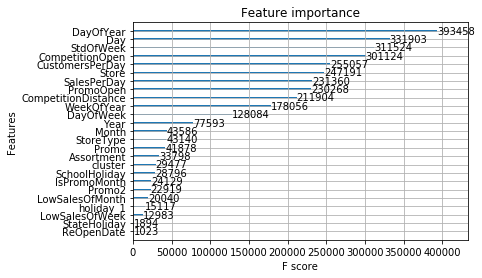

In [42]:
ax=xgb.plot_importance(gbm) 

In [ ]:
ntrees =1000
params = {"objective": "reg:linear",
              "booster": "gbtree",
              "n_estimators":170,
              "eta": 0.07,
              "max_depth": 17,
              "min_child_weight":13,
              "subsample": 0.9,
              "colsample_bytree": 0.5,
              "silent": 1,
              "seed":12
              }



dtrain = xgb.DMatrix(train_store[features_list], np.log1p(train_store['Sales']),nthread =-1)
watchlist = [(dtrain, 'train')]
gbm = xgb.train(params, dtrain, ntrees, evals=watchlist, early_stopping_rounds=50, feval=rmspe_xg, verbose_eval=100)


[0]	train-rmse:7.68182	train-rmspe:0.999668
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 50 rounds.
[100]	train-rmse:0.080289	train-rmspe:0.111371
[200]	train-rmse:0.064173	train-rmspe:0.079148
[300]	train-rmse:0.05884	train-rmspe:0.069985


In [ ]:
xgb_predictions = gbm.predict(xgb.DMatrix(test_store[features_list]))
indices = xgb_predictions < 0
xgb_predictions[indices] = 0
submission = pd.DataFrame({"Id": test_store['Id'], "Sales": np.expm1(xgb_predictions)})
submission.to_csv('xg_test_2005', index=False)